# **Project Goal: Build a knee osteoarthritis classifier using Ultralytics YOLOv8 and Finetuning for knee xrays**

This notebook demonstrates how to train a deep learning model to classify knee X-ray images
into two categories:

0: No arthritis

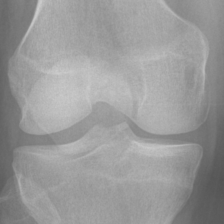

4: Severe arthritis (combining original classes 3 and 4 for simplicity)

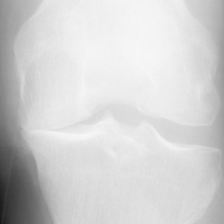


Osteoarthritis (OA), also known as degenerative joint disease or wear-and-tear arthritis, is a condition where the cartilage that cushions the ends of bones in joints gradually wears away, leading to pain, stiffness, and reduced joint movement.
It's the most common type of arthritis and often develops slowly, typically in middle to older age



Note Standard Scale for Knee Osteoarthritis

Kellgren-Lawrence (K-L) Grading Scale (for X-rays):

This is the most widely used system to classify the severity of osteoarthritis based on X-ray findings.

Grade 0: No radiographic features of OA. Normal knee.

Grade 1 (Doubtful): Minute osteophytes (small bone spurs) of doubtful clinical significance.

Grade 2 (Minimal/Mild): Definite osteophytes, and possible joint space narrowing.

Grade 3 (Moderate): Definite osteophytes, moderate joint space narrowing, some sclerosis (bone hardening), and possible deformity of bone ends.

Grade 4 (Severe): Large osteophytes, severe joint space narrowing, marked sclerosis, and definite deformity of bone ends.

We'll use the Ultralytics YOLOv8 library, which is known for its ease of use and performance.


# **Data Preparation**
The original knee X-ray dataset is used, but we'll focus on only two classes , 0 and 4*.

4* contains both class 3 and class 4 osteoarthritis



# **Mount your google drive so we can get the training and test knee images**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Install Ultralytics
First, we need to install the Ultralytics library.




In [ ]:
%pip install ultralytics==8.3.114

import ultralytics
ultralytics.checks()

Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.1/112.6 GB disk)



Download a Pre-trained Model:  
Ultralytics provides pre-trained models for various tasks. We'll start with a
classification model (yolov8n-cls) trained on the ImageNet dataset.
This model serves as a good starting point for fine-tuning on our knee X-ray data.
Run a quick inference on a sample image (not a knee X-ray) to see how it works


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n-cls.pt")

100%|██████████| 5.31M/5.31M [00:00<00:00, 283MB/s]


In [ ]:
image_source = "https://dss.fosterwebmarketing.com/upload/1066/Yellow%20Car(1).jpg"

# 4. Run inference (prediction) on the image
#    - The model(...) call performs the classification.
#    - For classification tasks on a single image, it returns a list containing one `Results` object.
#    - The `Results` object holds information about the predictions (top classes, probabilities, etc.).

results = model(image_source) # Assign to 'results' instead of '_' to inspect it

100%|██████████| 255k/255k [00:00<00:00, 401kB/s]


image 1/1 /content/Yellow Car(1).jpg: 224x224 cab 0.50, car_wheel 0.17, beach_wagon 0.12, grille 0.07, sports_car 0.05, 5.3ms
Speed: 68.7ms preprocess, 5.3ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


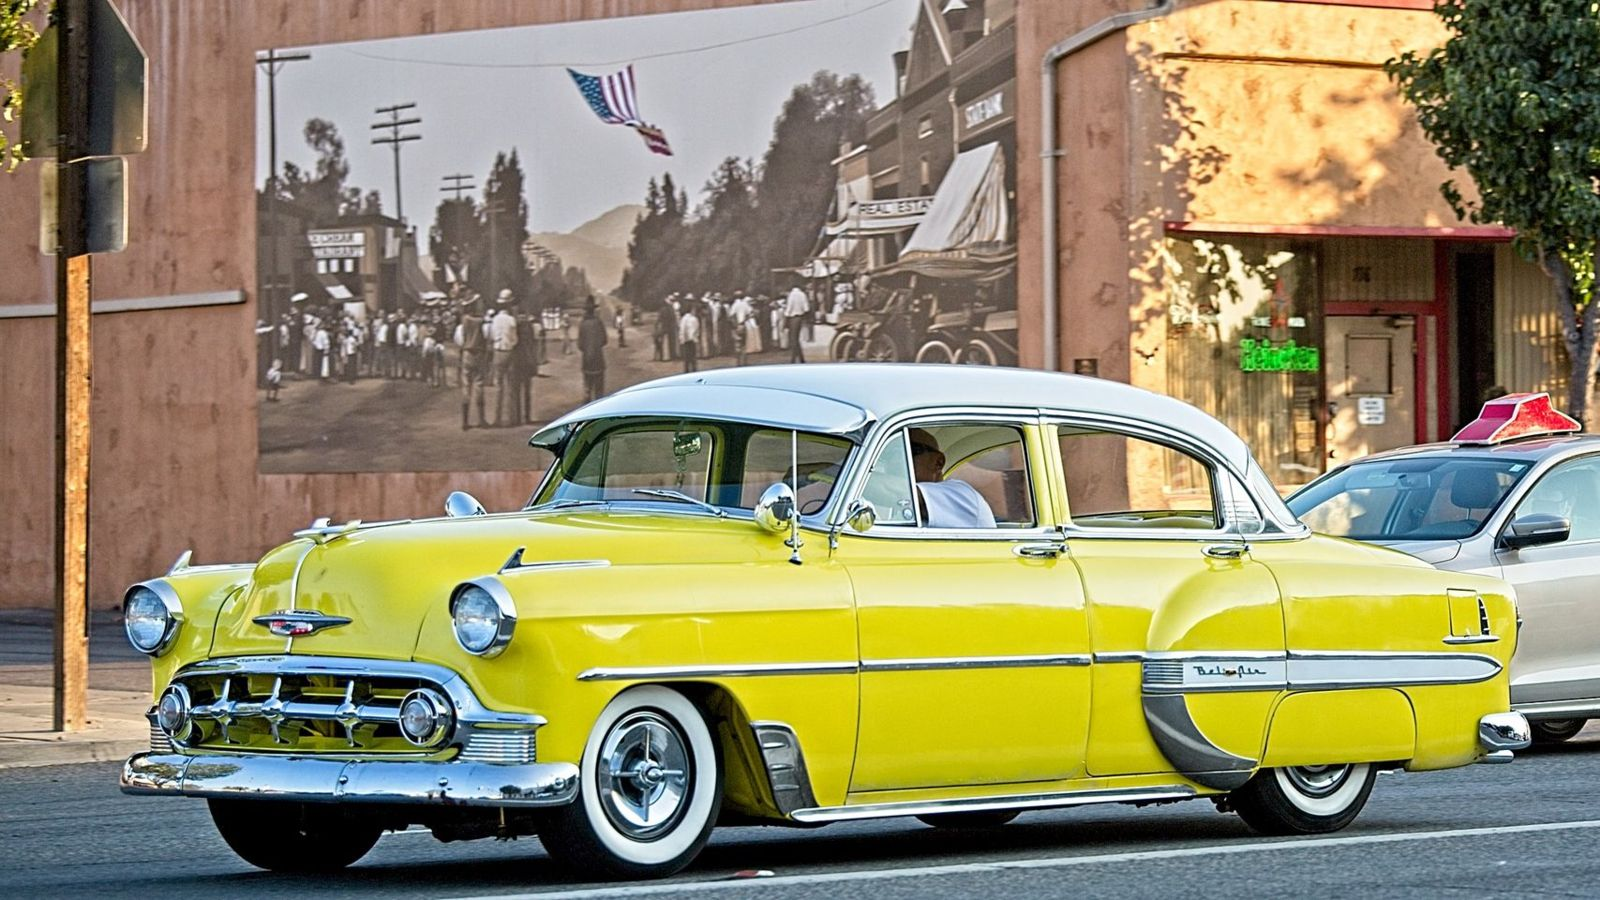

#Train the Model
Now, we'll fine-tune the pre-trained model on our knee X-ray dataset:

You can find sample datasets for knee xrays with osterarthitis, for example at Kaggle and Huggingface.

https://www.kaggle.com/datasets/gauravduttakiit/osteoarthritis-knee-xray#

https://huggingface.co/datasets/SilpaCS/kneeosteoarthritis

Note you can easily take any images you want and use this same code. Just need two classes of images, and the split into a test and train set. For this example I just have about 175 images of each class for the train set, and 35 images for each class in the test set. Ideally you should have a few thousand images in each class and hundreds of images in the test set. The reduced set used runs faster so you can see how the system works.

The knee images for test and train are stored as follows on google drive

/content/drive/MyDrive/knee-xr/knee-xr-2/test/0

/content/drive/MyDrive/knee-xr/knee-xr-2/test/4

/content/drive/MyDrive/knee-xr/knee-xr-2/train/0

/content/drive/MyDrive/knee-xr/knee-xr-2/train/4

Class 0 = No arthritis
Calss 4 = Severe arthritis (grade 3, grade 4)

`data`: Path to your dataset (organized into folders for each class).
`epochs`: Number of training iterations (200 in this case, you can drop to 30 if its too slow).
`freeze`: Number of layers to freeze in the pre-trained model (9 here). Freezing layers helps
preserve the general features learned from ImageNet and speeds up training.


In [ ]:
results = model.train(data="/content/drive/MyDrive/knee-xr/knee-xr-2", epochs=200, freeze=9)
save_dir = results.save_dir

New https://pypi.org/project/ultralytics/8.3.128 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/drive/MyDrive/knee-xr/knee-xr-2, epochs=200, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=9, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames

100%|██████████| 5.35M/5.35M [00:00<00:00, 266MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.5±0.2 ms, read: 0.0±0.0 MB/s, size: 19.0 KB)


train: Scanning /content/drive/MyDrive/knee-xr/knee-xr-2/train... 348 images, 0 corrupt: 100%|██████████| 348/348 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.8±0.3 ms, read: 0.0±0.0 MB/s, size: 22.5 KB)


val: Scanning /content/drive/MyDrive/knee-xr/knee-xr-2/test... 63 images, 0 corrupt: 100%|██████████| 63/63 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 200 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/200     0.145G     0.6865         16        224:   5%|▍         | 1/22 [00:00<00:11,  1.81it/s]


100%|██████████| 755k/755k [00:00<00:00, 86.1MB/s]
      1/200     0.145G     0.6996         12        224: 100%|██████████| 22/22 [00:59<00:00,  2.72s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00,  8.73it/s]

                   all      0.571          1



      Epoch    GPU_mem       loss  Instances       Size


      2/200     0.178G     0.6968         12        224: 100%|██████████| 22/22 [00:02<00:00,  8.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.46it/s]

                   all      0.492          1



      Epoch    GPU_mem       loss  Instances       Size


      3/200     0.178G     0.6883         12        224: 100%|██████████| 22/22 [00:03<00:00,  5.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 45.87it/s]

                   all      0.619          1



      Epoch    GPU_mem       loss  Instances       Size


      4/200     0.178G     0.6772         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 59.20it/s]

                   all      0.603          1



      Epoch    GPU_mem       loss  Instances       Size


      5/200     0.178G     0.7088         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 36.65it/s]

                   all      0.651          1



      Epoch    GPU_mem       loss  Instances       Size


      6/200      0.18G     0.6989         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.56it/s]

                   all      0.524          1



      Epoch    GPU_mem       loss  Instances       Size


      7/200     0.182G     0.7191         12        224: 100%|██████████| 22/22 [00:03<00:00,  5.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 30.82it/s]

                   all      0.524          1



      Epoch    GPU_mem       loss  Instances       Size


      8/200     0.182G     0.7115         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 43.42it/s]

                   all      0.524          1



      Epoch    GPU_mem       loss  Instances       Size


      9/200     0.182G     0.7048         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 36.45it/s]

                   all      0.524          1



      Epoch    GPU_mem       loss  Instances       Size


     10/200     0.182G     0.6883         12        224: 100%|██████████| 22/22 [00:03<00:00,  5.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.63it/s]

                   all      0.587          1



      Epoch    GPU_mem       loss  Instances       Size


     11/200     0.182G     0.7184         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 60.50it/s]

                   all      0.492          1



      Epoch    GPU_mem       loss  Instances       Size


     12/200     0.182G     0.6801         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 51.42it/s]

                   all      0.683          1



      Epoch    GPU_mem       loss  Instances       Size


     13/200     0.182G     0.6698         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 49.74it/s]

                   all      0.698          1



      Epoch    GPU_mem       loss  Instances       Size


     14/200     0.182G     0.6745         12        224: 100%|██████████| 22/22 [00:03<00:00,  5.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.56it/s]


                   all      0.508          1

      Epoch    GPU_mem       loss  Instances       Size


     15/200     0.184G     0.6784         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 40.71it/s]

                   all      0.714          1



      Epoch    GPU_mem       loss  Instances       Size


     16/200     0.184G     0.6759         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 48.00it/s]

                   all      0.698          1



      Epoch    GPU_mem       loss  Instances       Size


     17/200     0.184G     0.6669         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 46.31it/s]

                   all      0.651          1



      Epoch    GPU_mem       loss  Instances       Size


     18/200     0.184G     0.6852         12        224: 100%|██████████| 22/22 [00:04<00:00,  5.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 31.41it/s]

                   all      0.746          1



      Epoch    GPU_mem       loss  Instances       Size


     19/200     0.186G      0.673         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.87it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     20/200     0.186G      0.687         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 53.19it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     21/200     0.186G     0.6485         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 55.06it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     22/200     0.186G     0.6675         12        224: 100%|██████████| 22/22 [00:04<00:00,  5.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.20it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     23/200     0.186G      0.696         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 40.98it/s]

                   all      0.619          1



      Epoch    GPU_mem       loss  Instances       Size


     24/200     0.186G     0.6787         12        224: 100%|██████████| 22/22 [00:03<00:00,  5.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.95it/s]

                   all      0.651          1



      Epoch    GPU_mem       loss  Instances       Size


     25/200     0.186G     0.6659         12        224: 100%|██████████| 22/22 [00:04<00:00,  4.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.57it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     26/200     0.186G     0.6586         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 29.55it/s]

                   all      0.683          1



      Epoch    GPU_mem       loss  Instances       Size


     27/200     0.188G     0.6673         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 27.36it/s]

                   all      0.683          1



      Epoch    GPU_mem       loss  Instances       Size


     28/200     0.188G     0.6662         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 37.29it/s]

                   all      0.619          1



      Epoch    GPU_mem       loss  Instances       Size


     29/200     0.188G      0.683         12        224: 100%|██████████| 22/22 [00:04<00:00,  4.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.59it/s]

                   all      0.698          1



      Epoch    GPU_mem       loss  Instances       Size


     30/200     0.188G     0.6579         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 41.89it/s]

                   all      0.698          1



      Epoch    GPU_mem       loss  Instances       Size


     31/200     0.189G     0.6592         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 75.04it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     32/200     0.189G     0.6765         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 54.22it/s]

                   all      0.651          1



      Epoch    GPU_mem       loss  Instances       Size


     33/200     0.189G     0.6588         12        224: 100%|██████████| 22/22 [00:04<00:00,  4.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 63.54it/s]

                   all      0.683          1



      Epoch    GPU_mem       loss  Instances       Size


     34/200     0.189G     0.6518         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 56.79it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     35/200     0.189G     0.6335         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 50.31it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     36/200     0.189G     0.6606         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.78it/s]

                   all      0.714          1



      Epoch    GPU_mem       loss  Instances       Size


     37/200     0.189G     0.6611         12        224: 100%|██████████| 22/22 [00:04<00:00,  5.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 31.40it/s]

                   all      0.619          1



      Epoch    GPU_mem       loss  Instances       Size


     38/200     0.191G     0.6689         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 47.31it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     39/200     0.191G     0.6644         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 45.90it/s]

                   all       0.54          1



      Epoch    GPU_mem       loss  Instances       Size


     40/200     0.191G     0.6575         12        224: 100%|██████████| 22/22 [00:03<00:00,  5.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.22it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     41/200     0.193G     0.6754         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 44.45it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     42/200     0.193G      0.667         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 66.26it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     43/200     0.195G     0.6801         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 35.23it/s]

                   all      0.651          1



      Epoch    GPU_mem       loss  Instances       Size


     44/200     0.195G     0.6582         12        224: 100%|██████████| 22/22 [00:04<00:00,  5.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.61it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     45/200     0.195G     0.6504         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 52.24it/s]

                   all      0.619          1



      Epoch    GPU_mem       loss  Instances       Size


     46/200     0.195G     0.6422         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 54.01it/s]

                   all      0.714          1



      Epoch    GPU_mem       loss  Instances       Size


     47/200     0.195G     0.6665         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 47.70it/s]

                   all      0.698          1



      Epoch    GPU_mem       loss  Instances       Size


     48/200     0.195G     0.6784         12        224: 100%|██████████| 22/22 [00:04<00:00,  4.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 37.64it/s]

                   all      0.746          1



      Epoch    GPU_mem       loss  Instances       Size


     49/200     0.195G     0.6524         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 34.65it/s]

                   all      0.746          1



      Epoch    GPU_mem       loss  Instances       Size


     50/200     0.195G     0.6559         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 60.25it/s]

                   all      0.619          1



      Epoch    GPU_mem       loss  Instances       Size


     51/200     0.195G     0.6883         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 50.01it/s]

                   all      0.651          1



      Epoch    GPU_mem       loss  Instances       Size


     52/200     0.195G      0.687         12        224: 100%|██████████| 22/22 [00:04<00:00,  4.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 34.74it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     53/200     0.197G      0.662         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 50.77it/s]

                   all      0.683          1



      Epoch    GPU_mem       loss  Instances       Size


     54/200     0.197G     0.6315         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 43.02it/s]

                   all      0.619          1



      Epoch    GPU_mem       loss  Instances       Size


     55/200     0.199G     0.6574         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 56.70it/s]

                   all      0.651          1



      Epoch    GPU_mem       loss  Instances       Size


     56/200     0.199G     0.6476         12        224: 100%|██████████| 22/22 [00:04<00:00,  5.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 60.64it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     57/200     0.199G     0.6586         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 59.44it/s]

                   all      0.698          1



      Epoch    GPU_mem       loss  Instances       Size


     58/200     0.199G     0.6472         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 35.10it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     59/200     0.199G     0.6407         12        224: 100%|██████████| 22/22 [00:03<00:00,  5.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.25it/s]

                   all       0.73          1



      Epoch    GPU_mem       loss  Instances       Size


     60/200     0.199G     0.6557         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 43.75it/s]

                   all      0.698          1



      Epoch    GPU_mem       loss  Instances       Size


     61/200     0.199G     0.6434         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 60.68it/s]

                   all       0.73          1



      Epoch    GPU_mem       loss  Instances       Size


     62/200     0.199G     0.6507         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 31.58it/s]

                   all      0.619          1



      Epoch    GPU_mem       loss  Instances       Size


     63/200     0.199G     0.6255         12        224: 100%|██████████| 22/22 [00:04<00:00,  5.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.52it/s]

                   all      0.619          1



      Epoch    GPU_mem       loss  Instances       Size


     64/200     0.199G     0.6551         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 56.24it/s]

                   all       0.73          1



      Epoch    GPU_mem       loss  Instances       Size


     65/200     0.201G     0.6535         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 58.59it/s]

                   all      0.778          1



      Epoch    GPU_mem       loss  Instances       Size


     66/200     0.201G     0.6668         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 64.29it/s]

                   all      0.651          1



      Epoch    GPU_mem       loss  Instances       Size


     67/200     0.203G     0.6265         12        224: 100%|██████████| 22/22 [00:04<00:00,  4.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 63.56it/s]

                   all      0.556          1



      Epoch    GPU_mem       loss  Instances       Size


     68/200     0.203G     0.6494         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 57.15it/s]

                   all      0.619          1



      Epoch    GPU_mem       loss  Instances       Size


     69/200     0.203G     0.6636         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 61.62it/s]

                   all      0.698          1



      Epoch    GPU_mem       loss  Instances       Size


     70/200     0.203G     0.6714         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 57.60it/s]

                   all      0.556          1



      Epoch    GPU_mem       loss  Instances       Size


     71/200     0.203G     0.6481         12        224: 100%|██████████| 22/22 [00:04<00:00,  5.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 58.40it/s]

                   all      0.746          1

      Epoch    GPU_mem       loss  Instances       Size



     72/200     0.203G     0.6425         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 46.24it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     73/200     0.203G     0.6557         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 48.36it/s]

                   all      0.714          1



      Epoch    GPU_mem       loss  Instances       Size


     74/200     0.203G     0.6495         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 35.83it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     75/200     0.205G     0.6481         12        224: 100%|██████████| 22/22 [00:04<00:00,  5.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 66.35it/s]

                   all      0.651          1



      Epoch    GPU_mem       loss  Instances       Size


     76/200     0.205G     0.6434         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 46.08it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     77/200     0.205G     0.6261         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 59.69it/s]

                   all      0.762          1



      Epoch    GPU_mem       loss  Instances       Size


     78/200     0.205G     0.6392         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.79it/s]

                   all      0.683          1



      Epoch    GPU_mem       loss  Instances       Size


     79/200     0.207G     0.6245         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 35.70it/s]

                   all       0.73          1



      Epoch    GPU_mem       loss  Instances       Size


     80/200     0.207G     0.6216         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 37.96it/s]

                   all      0.603          1



      Epoch    GPU_mem       loss  Instances       Size


     81/200     0.207G      0.651         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 54.64it/s]

                   all       0.81          1



      Epoch    GPU_mem       loss  Instances       Size


     82/200     0.207G     0.6832         12        224: 100%|██████████| 22/22 [00:03<00:00,  5.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 58.12it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     83/200     0.207G     0.6538         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 76.72it/s]

                   all       0.73          1



      Epoch    GPU_mem       loss  Instances       Size


     84/200     0.207G     0.6655         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 34.35it/s]

                   all       0.73          1



      Epoch    GPU_mem       loss  Instances       Size


     85/200     0.207G     0.6418         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 35.48it/s]

                   all       0.73          1



      Epoch    GPU_mem       loss  Instances       Size


     86/200     0.207G     0.6275         12        224: 100%|██████████| 22/22 [00:04<00:00,  5.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 43.14it/s]

                   all      0.778          1



      Epoch    GPU_mem       loss  Instances       Size


     87/200     0.209G      0.667         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 71.11it/s]

                   all      0.698          1

      Epoch    GPU_mem       loss  Instances       Size



     88/200     0.209G     0.6395         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 30.86it/s]

                   all      0.651          1



      Epoch    GPU_mem       loss  Instances       Size


     89/200     0.209G     0.6392         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 43.07it/s]

                   all      0.571          1



      Epoch    GPU_mem       loss  Instances       Size


     90/200     0.209G     0.6314         12        224: 100%|██████████| 22/22 [00:04<00:00,  5.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 42.85it/s]

                   all      0.587          1



      Epoch    GPU_mem       loss  Instances       Size


     91/200     0.211G     0.6341         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 54.72it/s]

                   all      0.619          1



      Epoch    GPU_mem       loss  Instances       Size


     92/200     0.211G     0.6421         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 56.96it/s]

                   all      0.714          1



      Epoch    GPU_mem       loss  Instances       Size


     93/200     0.211G     0.6222         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 47.71it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     94/200     0.211G     0.6356         12        224: 100%|██████████| 22/22 [00:04<00:00,  4.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 50.92it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     95/200     0.211G      0.647         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 49.33it/s]

                   all      0.651          1



      Epoch    GPU_mem       loss  Instances       Size


     96/200     0.211G     0.6203         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 72.70it/s]

                   all      0.698          1



      Epoch    GPU_mem       loss  Instances       Size


     97/200     0.211G     0.6317         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 41.31it/s]

                   all      0.746          1



      Epoch    GPU_mem       loss  Instances       Size


     98/200     0.211G     0.6194         12        224: 100%|██████████| 22/22 [00:04<00:00,  5.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 29.74it/s]

                   all      0.651          1



      Epoch    GPU_mem       loss  Instances       Size


     99/200     0.211G     0.6334         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 40.94it/s]

                   all      0.683          1



      Epoch    GPU_mem       loss  Instances       Size


    100/200     0.211G     0.6544         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 76.71it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


    101/200     0.211G     0.6416         12        224: 100%|██████████| 22/22 [00:04<00:00,  5.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.01it/s]

                   all      0.762          1



      Epoch    GPU_mem       loss  Instances       Size


    102/200     0.211G     0.6428         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 43.73it/s]

                   all      0.683          1



      Epoch    GPU_mem       loss  Instances       Size


    103/200     0.215G     0.6183         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 29.49it/s]

                   all      0.683          1



      Epoch    GPU_mem       loss  Instances       Size


    104/200     0.215G     0.6272         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 39.49it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


    105/200     0.215G     0.6607         12        224: 100%|██████████| 22/22 [00:04<00:00,  4.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 67.87it/s]

                   all      0.746          1



      Epoch    GPU_mem       loss  Instances       Size


    106/200     0.215G     0.6504         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 33.83it/s]

                   all      0.698          1



      Epoch    GPU_mem       loss  Instances       Size


    107/200     0.215G     0.6385         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 46.18it/s]

                   all      0.556          1



      Epoch    GPU_mem       loss  Instances       Size


    108/200     0.215G     0.6268         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 34.00it/s]

                   all      0.794          1



      Epoch    GPU_mem       loss  Instances       Size


    109/200     0.215G     0.6537         12        224: 100%|██████████| 22/22 [00:04<00:00,  4.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 38.60it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


    110/200     0.215G     0.6565         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 61.34it/s]

                   all      0.619          1



      Epoch    GPU_mem       loss  Instances       Size


    111/200     0.215G     0.6328         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 42.64it/s]

                   all      0.714          1



      Epoch    GPU_mem       loss  Instances       Size


    112/200     0.215G     0.6558         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.85it/s]

                   all      0.698          1



      Epoch    GPU_mem       loss  Instances       Size


    113/200     0.215G      0.625         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 39.80it/s]

                   all      0.698          1



      Epoch    GPU_mem       loss  Instances       Size


    114/200     0.215G     0.6124         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 46.34it/s]

                   all      0.746          1



      Epoch    GPU_mem       loss  Instances       Size


    115/200     0.215G      0.639         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 69.57it/s]

                   all      0.698          1



      Epoch    GPU_mem       loss  Instances       Size


    116/200     0.215G     0.6658         12        224: 100%|██████████| 22/22 [00:03<00:00,  5.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.77it/s]

                   all      0.746          1



      Epoch    GPU_mem       loss  Instances       Size


    117/200     0.215G     0.6477         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 37.62it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


    118/200     0.215G     0.6117         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 58.65it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


    119/200     0.215G     0.6433         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 57.29it/s]

                   all      0.698          1



      Epoch    GPU_mem       loss  Instances       Size


    120/200     0.215G     0.6623         12        224: 100%|██████████| 22/22 [00:04<00:00,  5.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 43.70it/s]

                   all      0.651          1



      Epoch    GPU_mem       loss  Instances       Size


    121/200     0.215G     0.6494         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 45.33it/s]

                   all      0.794          1



      Epoch    GPU_mem       loss  Instances       Size


    122/200     0.215G     0.6421         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.87it/s]

                   all      0.714          1



      Epoch    GPU_mem       loss  Instances       Size


    123/200     0.215G     0.6083         12        224: 100%|██████████| 22/22 [00:04<00:00,  4.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.66it/s]

                   all      0.714          1



      Epoch    GPU_mem       loss  Instances       Size


    124/200     0.215G     0.6471         12        224: 100%|██████████| 22/22 [00:03<00:00,  5.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 44.88it/s]

                   all      0.746          1



      Epoch    GPU_mem       loss  Instances       Size


    125/200     0.215G      0.622         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 41.79it/s]

                   all      0.778          1



      Epoch    GPU_mem       loss  Instances       Size


    126/200     0.215G     0.6433         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 60.47it/s]

                   all      0.762          1



      Epoch    GPU_mem       loss  Instances       Size


    127/200     0.215G     0.6376         12        224: 100%|██████████| 22/22 [00:03<00:00,  5.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.23it/s]

                   all      0.794          1



      Epoch    GPU_mem       loss  Instances       Size


    128/200     0.215G     0.6483         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 50.04it/s]

                   all      0.746          1



      Epoch    GPU_mem       loss  Instances       Size


    129/200     0.215G     0.6345         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 31.10it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


    130/200     0.215G     0.6052         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 33.85it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


    131/200     0.215G     0.6432         12        224: 100%|██████████| 22/22 [00:04<00:00,  5.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 48.52it/s]

                   all      0.651          1



      Epoch    GPU_mem       loss  Instances       Size


    132/200     0.215G     0.6316         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 49.00it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


    133/200     0.215G      0.631         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 45.38it/s]

                   all       0.81          1



      Epoch    GPU_mem       loss  Instances       Size


    134/200     0.215G     0.6301         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 56.80it/s]

                   all      0.778          1



      Epoch    GPU_mem       loss  Instances       Size


    135/200     0.215G     0.6297         12        224: 100%|██████████| 22/22 [00:04<00:00,  5.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 51.47it/s]

                   all      0.714          1



      Epoch    GPU_mem       loss  Instances       Size


    136/200     0.215G     0.6244         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 58.40it/s]

                   all      0.651          1



      Epoch    GPU_mem       loss  Instances       Size


    137/200     0.215G     0.6554         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 52.99it/s]

                   all      0.762          1



      Epoch    GPU_mem       loss  Instances       Size


    138/200     0.215G      0.614         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 33.68it/s]

                   all       0.81          1



      Epoch    GPU_mem       loss  Instances       Size


    139/200     0.215G     0.6439         12        224: 100%|██████████| 22/22 [00:04<00:00,  5.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 74.89it/s]

                   all      0.762          1



      Epoch    GPU_mem       loss  Instances       Size


    140/200     0.215G     0.6387         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 84.00it/s]

                   all      0.698          1



      Epoch    GPU_mem       loss  Instances       Size


    141/200     0.215G     0.6426         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 64.63it/s]

                   all      0.714          1



      Epoch    GPU_mem       loss  Instances       Size


    142/200     0.215G       0.64         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 30.29it/s]

                   all      0.762          1



      Epoch    GPU_mem       loss  Instances       Size


    143/200     0.215G     0.6074         12        224: 100%|██████████| 22/22 [00:03<00:00,  5.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 30.19it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


    144/200     0.215G     0.6158         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 35.94it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


    145/200     0.215G     0.6435         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 47.78it/s]

                   all      0.651          1



      Epoch    GPU_mem       loss  Instances       Size


    146/200     0.215G     0.6149         12        224: 100%|██████████| 22/22 [00:03<00:00,  5.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.55it/s]

                   all      0.698          1



      Epoch    GPU_mem       loss  Instances       Size


    147/200     0.215G     0.6343         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 55.52it/s]

                   all      0.698          1



      Epoch    GPU_mem       loss  Instances       Size


    148/200     0.215G     0.6184         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 56.70it/s]

                   all      0.762          1



      Epoch    GPU_mem       loss  Instances       Size


    149/200     0.215G     0.6277         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 32.63it/s]

                   all      0.762          1



      Epoch    GPU_mem       loss  Instances       Size


    150/200     0.215G     0.6227         12        224: 100%|██████████| 22/22 [00:04<00:00,  5.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.20it/s]

                   all       0.81          1



      Epoch    GPU_mem       loss  Instances       Size


    151/200     0.215G     0.6295         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 47.73it/s]

                   all      0.794          1



      Epoch    GPU_mem       loss  Instances       Size


    152/200     0.215G      0.611         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 47.72it/s]

                   all      0.794          1



      Epoch    GPU_mem       loss  Instances       Size


    153/200     0.215G     0.6587         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 56.04it/s]

                   all      0.794          1



      Epoch    GPU_mem       loss  Instances       Size


    154/200     0.215G     0.6439         12        224: 100%|██████████| 22/22 [00:04<00:00,  4.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 46.88it/s]

                   all      0.651          1



      Epoch    GPU_mem       loss  Instances       Size


    155/200     0.215G     0.6457         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 54.14it/s]

                   all      0.683          1



      Epoch    GPU_mem       loss  Instances       Size


    156/200     0.215G     0.6377         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 68.55it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


    157/200     0.215G     0.6451         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 35.63it/s]

                   all      0.762          1



      Epoch    GPU_mem       loss  Instances       Size


    158/200     0.215G     0.6188         12        224: 100%|██████████| 22/22 [00:04<00:00,  4.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 55.87it/s]

                   all      0.746          1



      Epoch    GPU_mem       loss  Instances       Size


    159/200     0.215G     0.6608         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 48.71it/s]

                   all      0.762          1



      Epoch    GPU_mem       loss  Instances       Size


    160/200     0.215G     0.6209         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 31.45it/s]

                   all      0.778          1



      Epoch    GPU_mem       loss  Instances       Size


    161/200     0.215G     0.6333         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 32.03it/s]

                   all      0.778          1



      Epoch    GPU_mem       loss  Instances       Size


    162/200     0.215G     0.6343         12        224: 100%|██████████| 22/22 [00:04<00:00,  5.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 61.62it/s]

                   all      0.746          1



      Epoch    GPU_mem       loss  Instances       Size


    163/200     0.215G     0.6474         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 57.14it/s]

                   all       0.73          1



      Epoch    GPU_mem       loss  Instances       Size


    164/200     0.215G     0.6269         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 34.92it/s]

                   all      0.794          1



      Epoch    GPU_mem       loss  Instances       Size


    165/200     0.215G     0.6175         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 41.92it/s]

                   all      0.794          1



      Epoch    GPU_mem       loss  Instances       Size


    166/200     0.215G     0.6284         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 60.37it/s]

                   all      0.762          1



      Epoch    GPU_mem       loss  Instances       Size


    167/200     0.215G      0.612         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 45.40it/s]

                   all      0.698          1



      Epoch    GPU_mem       loss  Instances       Size


    168/200     0.215G     0.6136         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 49.42it/s]

                   all      0.683          1



      Epoch    GPU_mem       loss  Instances       Size


    169/200     0.215G     0.6161         12        224: 100%|██████████| 22/22 [00:03<00:00,  5.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.94it/s]

                   all      0.762          1



      Epoch    GPU_mem       loss  Instances       Size


    170/200     0.215G     0.6178         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 63.07it/s]

                   all       0.73          1



      Epoch    GPU_mem       loss  Instances       Size


    171/200     0.215G     0.6034         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 52.04it/s]

                   all      0.778          1



      Epoch    GPU_mem       loss  Instances       Size


    172/200     0.215G     0.6407         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 77.06it/s]

                   all      0.762          1



      Epoch    GPU_mem       loss  Instances       Size


    173/200     0.215G     0.6183         12        224: 100%|██████████| 22/22 [00:05<00:00,  4.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 31.43it/s]

                   all      0.762          1



      Epoch    GPU_mem       loss  Instances       Size


    174/200     0.215G     0.6268         12        224: 100%|██████████| 22/22 [00:03<00:00,  5.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 42.95it/s]

                   all      0.762          1



      Epoch    GPU_mem       loss  Instances       Size


    175/200     0.215G     0.6452         12        224: 100%|██████████| 22/22 [00:02<00:00,  7.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 52.70it/s]

                   all      0.778          1



      Epoch    GPU_mem       loss  Instances       Size


    176/200     0.215G     0.6271         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 70.91it/s]

                   all      0.778          1



      Epoch    GPU_mem       loss  Instances       Size


    177/200     0.215G      0.616         12        224: 100%|██████████| 22/22 [00:04<00:00,  4.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.80it/s]

                   all      0.794          1



      Epoch    GPU_mem       loss  Instances       Size


    178/200     0.215G     0.6073         12        224: 100%|██████████| 22/22 [00:03<00:00,  7.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 76.72it/s]

                   all      0.762          1



      Epoch    GPU_mem       loss  Instances       Size


    179/200     0.215G     0.6343         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 49.46it/s]

                   all      0.762          1



      Epoch    GPU_mem       loss  Instances       Size


    180/200     0.215G     0.6368         12        224: 100%|██████████| 22/22 [00:03<00:00,  6.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.19it/s]


                   all      0.762          1

      Epoch    GPU_mem       loss  Instances       Size


    181/200     0.215G     0.6396         12        224: 100%|██████████| 22/22 [00:04<00:00,  4.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 70.78it/s]

                   all       0.73          1
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 81, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



181 epochs completed in 0.201 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,437,442 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/drive/MyDrive/knee-xr/knee-xr-2/train... found 348 images in 2 classes ✅ 
val: /content/drive/MyDrive/knee-xr/knee-xr-2/test... found 63 images in 2 classes ✅ 
test: /content/drive/MyDrive/knee-xr/knee-xr-2/test... found 63 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.50it/s]


                   all       0.81          1
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


#Test the Trained Model
After training, we need to load the best performing weights (saved during training)
and test the model on a sample knee X-ray image.

In [ ]:
knee_model = YOLO(str(save_dir) + "/weights/best.pt")
_ = knee_model("/content/drive/MyDrive/knee-xr/kneexrfinalexam/4/9070207R.png")


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/4/9070207R.png: 224x224 0 0.51, 4 0.49, 3.2ms
Speed: 3.0ms preprocess, 3.2ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


Let us try out our model on knee images that the model has not seen before
Images of the knee are stored in the following folders.

/content/drive/MyDrive/knee-xr/kneexrfinalexam/0

/content/drive/MyDrive/knee-xr/kneexrfinalexam/4

The images in kneexrfinalexam - have be held out and are definitely not in the dataset used to build out knee_model. This allows us to attempt to see how this model might work in the general population

**Test on knee cases with severe arthritis**

Processing image: 9971710L.png


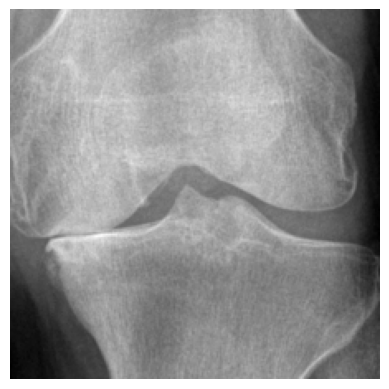


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/4/9971710L.png: 224x224 0 0.52, 4 0.48, 7.4ms
Speed: 3.2ms preprocess, 7.4ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.5175
--------------------
Processing image: 9617213R.png


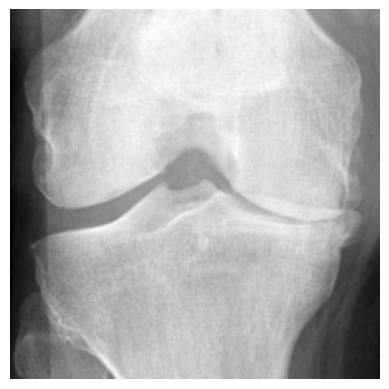


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/4/9617213R.png: 224x224 0 0.50, 4 0.50, 5.2ms
Speed: 2.7ms preprocess, 5.2ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.5006
--------------------
Processing image: 9267719R.png


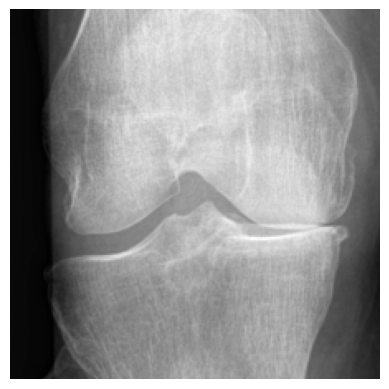


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/4/9267719R.png: 224x224 4 0.53, 0 0.47, 4.9ms
Speed: 3.0ms preprocess, 4.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 4
  Confidence: 0.5323
--------------------
Processing image: 9070207R.png


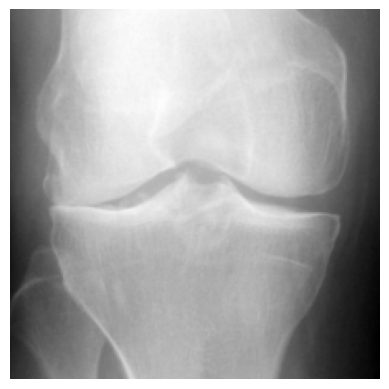


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/4/9070207R.png: 224x224 0 0.51, 4 0.49, 4.5ms
Speed: 2.9ms preprocess, 4.5ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.5143
--------------------
Processing image: 9230504R.png


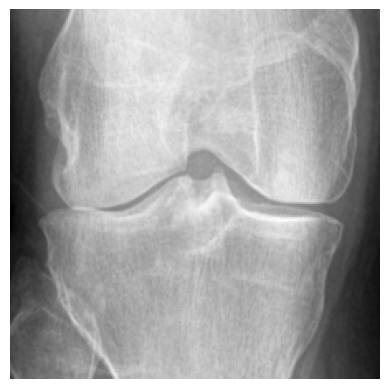


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/4/9230504R.png: 224x224 0 0.55, 4 0.45, 5.2ms
Speed: 4.0ms preprocess, 5.2ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.5544
--------------------
Processing image: 9997856L.png


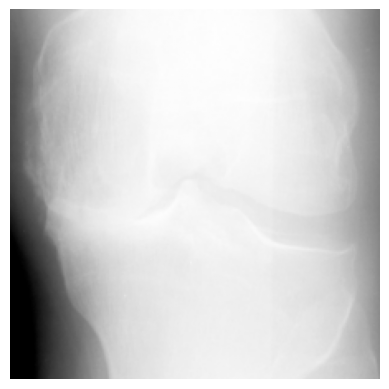


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/4/9997856L.png: 224x224 0 0.54, 4 0.46, 6.4ms
Speed: 4.9ms preprocess, 6.4ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.5387
--------------------
Processing image: 9511862R.png


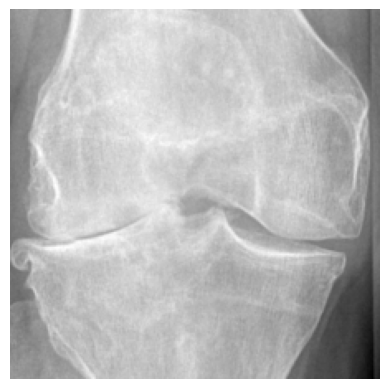


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/4/9511862R.png: 224x224 4 0.65, 0 0.35, 5.6ms
Speed: 2.6ms preprocess, 5.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 4
  Confidence: 0.6519
--------------------
Processing image: 9086204R.png


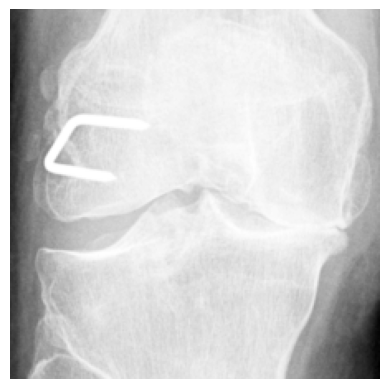


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/4/9086204R.png: 224x224 4 0.53, 0 0.47, 5.9ms
Speed: 3.1ms preprocess, 5.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 4
  Confidence: 0.5341
--------------------
Processing image: 9127180L.png


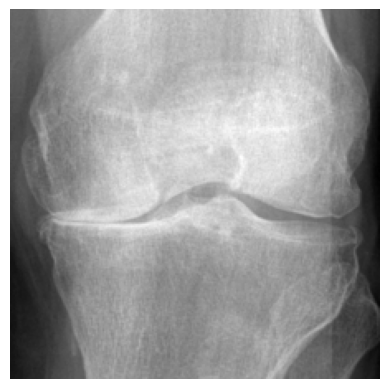


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/4/9127180L.png: 224x224 0 0.58, 4 0.42, 4.5ms
Speed: 3.6ms preprocess, 4.5ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.5837
--------------------
Processing image: 9395979R.png


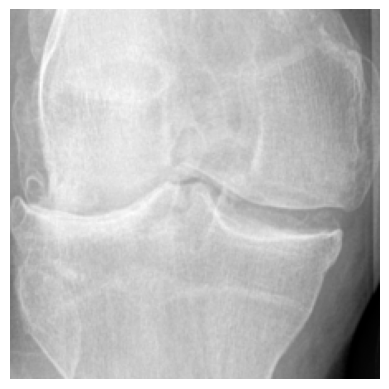


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/4/9395979R.png: 224x224 4 0.72, 0 0.28, 4.9ms
Speed: 2.6ms preprocess, 4.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 4
  Confidence: 0.7189
--------------------
Processing image: 9757953L.png


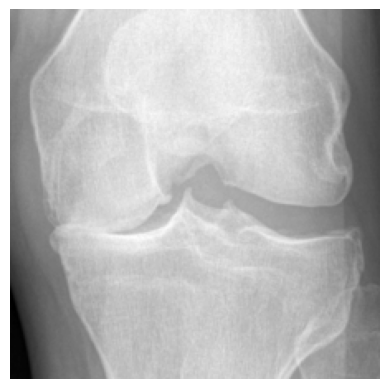


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/4/9757953L.png: 224x224 0 0.64, 4 0.36, 5.8ms
Speed: 3.4ms preprocess, 5.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.6387
--------------------
Processing image: 9637958R.png


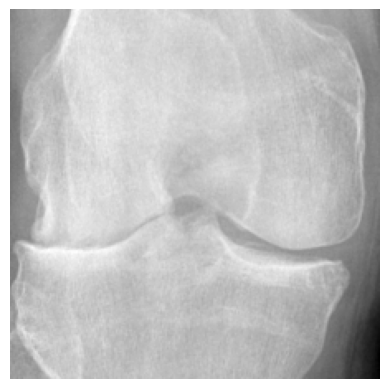


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/4/9637958R.png: 224x224 4 0.80, 0 0.20, 5.4ms
Speed: 3.6ms preprocess, 5.4ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 4
  Confidence: 0.8012
--------------------
Processing image: 9961951L.png


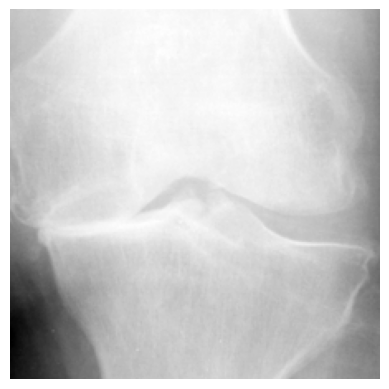


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/4/9961951L.png: 224x224 4 0.74, 0 0.26, 5.4ms
Speed: 2.9ms preprocess, 5.4ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 4
  Confidence: 0.7438
--------------------
Processing image: 9800368L.png


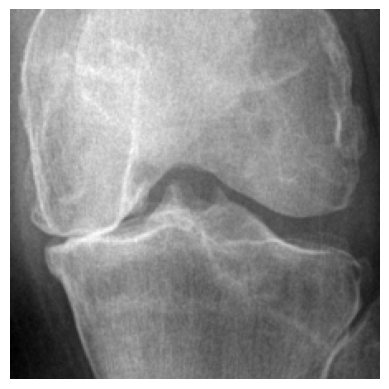


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/4/9800368L.png: 224x224 4 0.52, 0 0.48, 4.6ms
Speed: 3.1ms preprocess, 4.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 4
  Confidence: 0.5170
--------------------
Processing image: 9824005L.png


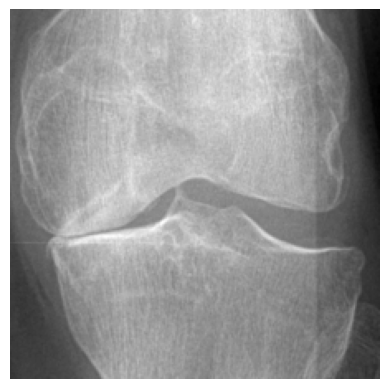


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/4/9824005L.png: 224x224 0 0.51, 4 0.49, 8.7ms
Speed: 2.6ms preprocess, 8.7ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.5075
--------------------
Processing image: 9645612L.png


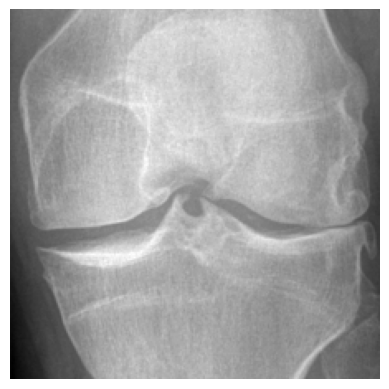


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/4/9645612L.png: 224x224 0 0.58, 4 0.42, 4.3ms
Speed: 2.5ms preprocess, 4.3ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.5769
--------------------
Processing image: 9284795L.png


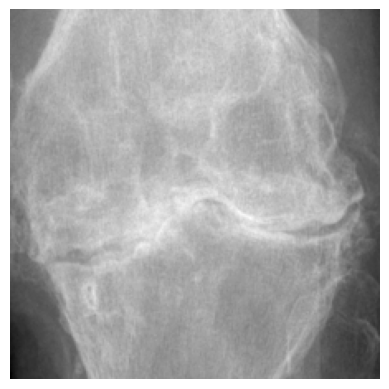


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/4/9284795L.png: 224x224 4 0.55, 0 0.45, 4.6ms
Speed: 2.6ms preprocess, 4.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 4
  Confidence: 0.5549
--------------------
Processing image: 9115049L.png


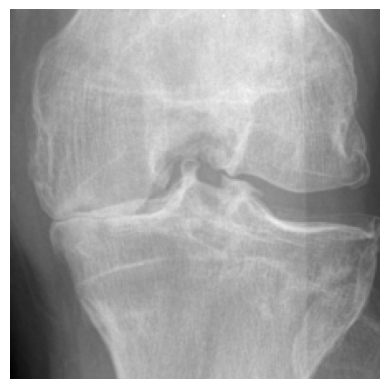


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/4/9115049L.png: 224x224 4 0.54, 0 0.46, 5.4ms
Speed: 3.5ms preprocess, 5.4ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 4
  Confidence: 0.5364
--------------------
Processing image: 9235666R.png


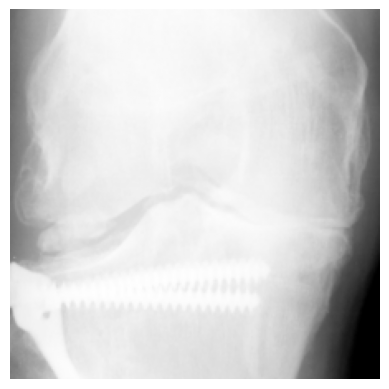


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/4/9235666R.png: 224x224 4 0.54, 0 0.46, 4.9ms
Speed: 4.4ms preprocess, 4.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 4
  Confidence: 0.5366
--------------------
Processing image: 9387265L.png


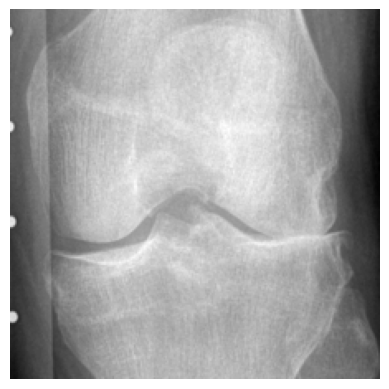


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/4/9387265L.png: 224x224 4 0.61, 0 0.39, 5.4ms
Speed: 4.7ms preprocess, 5.4ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 4
  Confidence: 0.6069
--------------------
Processing image: 9818359L.png


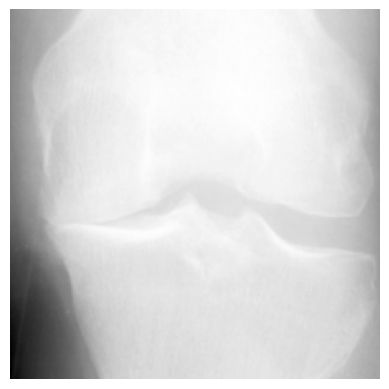


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/4/9818359L.png: 224x224 4 0.61, 0 0.39, 4.6ms
Speed: 2.8ms preprocess, 4.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 4
  Confidence: 0.6102
--------------------
Processing image: 9627172R.png


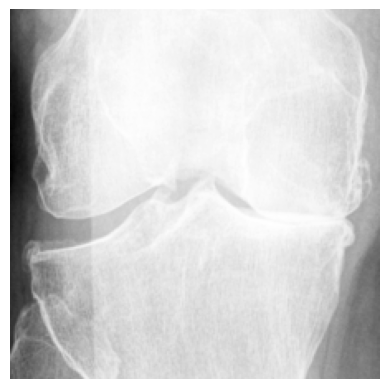


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/4/9627172R.png: 224x224 4 0.54, 0 0.46, 5.4ms
Speed: 2.6ms preprocess, 5.4ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 4
  Confidence: 0.5405
--------------------
Processing image: 9693806R.png


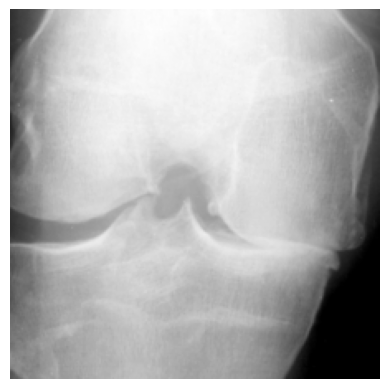


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/4/9693806R.png: 224x224 4 0.57, 0 0.43, 4.7ms
Speed: 3.3ms preprocess, 4.7ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 4
  Confidence: 0.5685
--------------------
Processing image: 9177337R.png


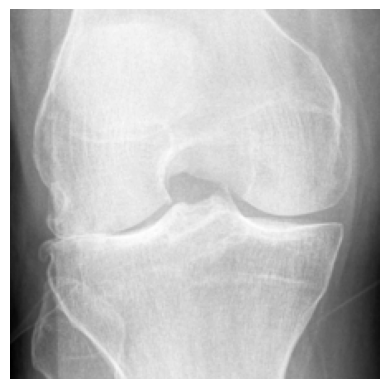


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/4/9177337R.png: 224x224 4 0.64, 0 0.36, 5.3ms
Speed: 3.8ms preprocess, 5.3ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 4
  Confidence: 0.6430
--------------------
Processing image: 9928082L.png


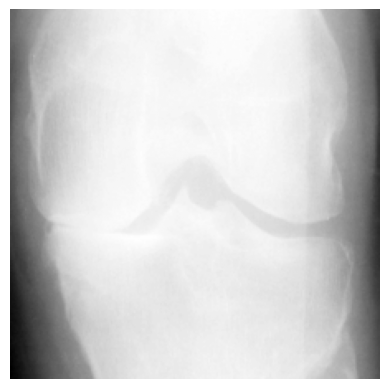


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/4/9928082L.png: 224x224 4 0.53, 0 0.47, 5.1ms
Speed: 2.8ms preprocess, 5.1ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 4
  Confidence: 0.5324
--------------------
Processing image: 9549818R.png


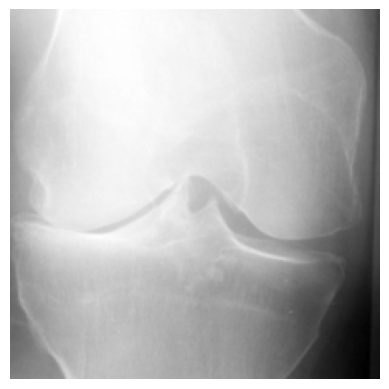


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/4/9549818R.png: 224x224 4 0.68, 0 0.32, 4.6ms
Speed: 2.6ms preprocess, 4.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 4
  Confidence: 0.6760
--------------------
Processing image: 9512864L.png


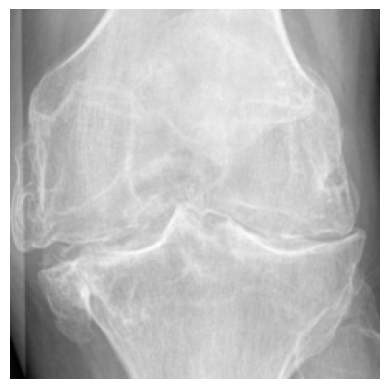


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/4/9512864L.png: 224x224 4 0.77, 0 0.23, 6.3ms
Speed: 3.7ms preprocess, 6.3ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 4
  Confidence: 0.7740
--------------------


In [ ]:
import os # import the os module to use operating system related functions
import matplotlib.pyplot as plt # import matplotlib for image plotting

# Specify the folder containing images, try 0, then 4
#image_folder = "/content/drive/MyDrive/knee-xr/kneexrfinalexam/0"
image_folder = "/content/drive/MyDrive/knee-xr/kneexrfinalexam/4"
# Function to display an image
def plotimage(image_path):
    """Displays an image using Matplotlib."""
    img = plt.imread(image_path)
    plt.imshow(img, cmap='grey')
    plt.axis('off') # Hide axis ticks
    plt.show()

# Iterate through each image in the folder
for filename in os.listdir(image_folder):
    if filename.endswith((".jpg", ".jpeg", ".png")):  # Adjust extensions as needed
        image_path = os.path.join(image_folder, filename)
        print(f"Processing image: {filename}")
        plotimage(image_path)
        try:
          # Perform inference
          results = knee_model(image_path)
          result = results[0]

          # Print top prediction for the current image
          top1_index = result.probs.top1
          top1_confidence = result.probs.top1conf.item()
          top1_name = result.names[top1_index]

          print(f"  Top Predicted Class: {top1_name}")
          print(f"  Confidence: {top1_confidence:.4f}")
          print("-" * 20)

        except Exception as e:
          print(f"Error processing {filename}: {e}")

Test on knee case without arthritis

Processing image: 9891187L.png


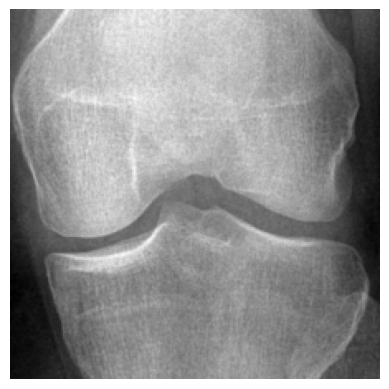


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9891187L.png: 224x224 4 0.53, 0 0.47, 6.4ms
Speed: 2.9ms preprocess, 6.4ms inference, 0.2ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 4
  Confidence: 0.5297
--------------------
Processing image: 9919343R.png


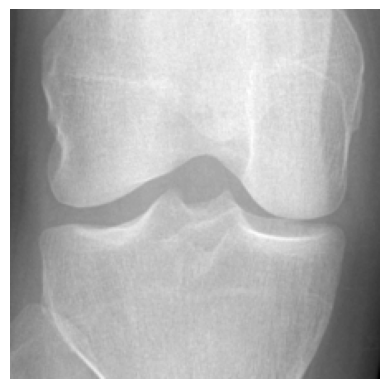


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9919343R.png: 224x224 0 0.64, 4 0.36, 5.7ms
Speed: 2.6ms preprocess, 5.7ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.6364
--------------------
Processing image: 9934064R.png


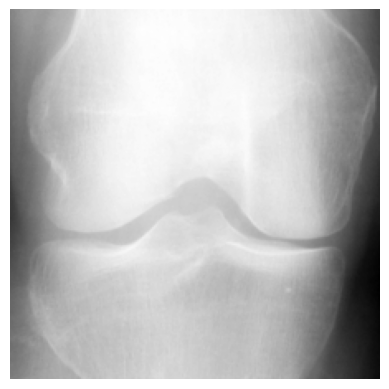


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9934064R.png: 224x224 0 0.51, 4 0.49, 6.7ms
Speed: 3.0ms preprocess, 6.7ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.5051
--------------------
Processing image: 9908315L.png


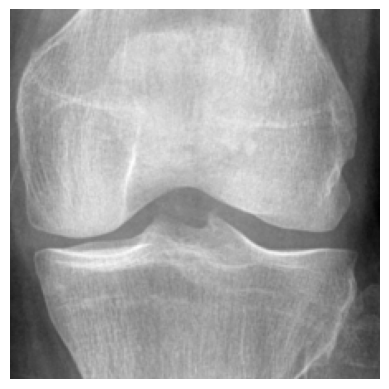


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9908315L.png: 224x224 0 0.58, 4 0.42, 5.2ms
Speed: 2.9ms preprocess, 5.2ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.5833
--------------------
Processing image: 9891187R.png


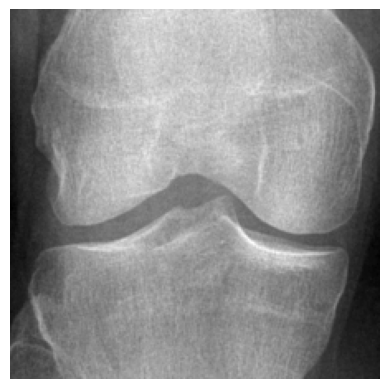


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9891187R.png: 224x224 0 0.59, 4 0.41, 6.0ms
Speed: 2.9ms preprocess, 6.0ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.5851
--------------------
Processing image: 9888738L.png


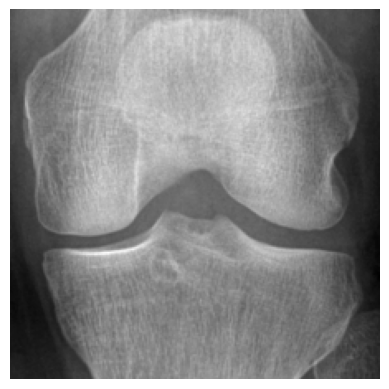


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9888738L.png: 224x224 0 0.62, 4 0.38, 4.7ms
Speed: 2.6ms preprocess, 4.7ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.6244
--------------------
Processing image: 9949467R.png


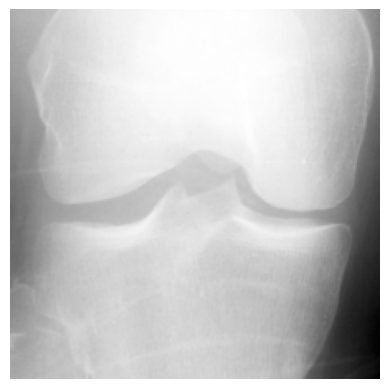


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9949467R.png: 224x224 4 0.52, 0 0.48, 5.7ms
Speed: 3.5ms preprocess, 5.7ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 4
  Confidence: 0.5191
--------------------
Processing image: 9999365L.png


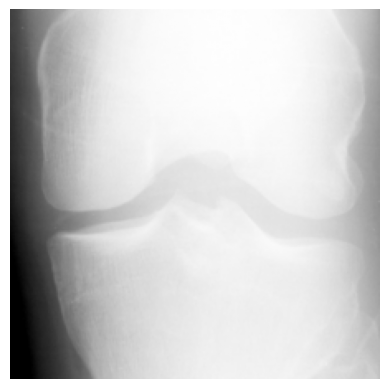


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9999365L.png: 224x224 0 0.60, 4 0.40, 4.7ms
Speed: 2.8ms preprocess, 4.7ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.6043
--------------------
Processing image: 9879214R.png


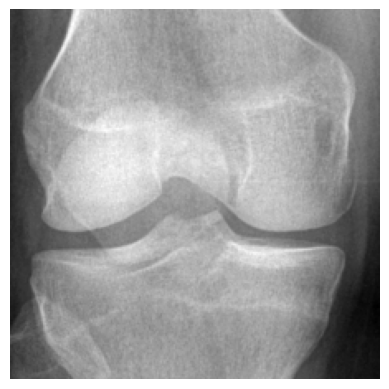


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9879214R.png: 224x224 0 0.51, 4 0.49, 5.0ms
Speed: 2.7ms preprocess, 5.0ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.5084
--------------------
Processing image: 9888738R.png


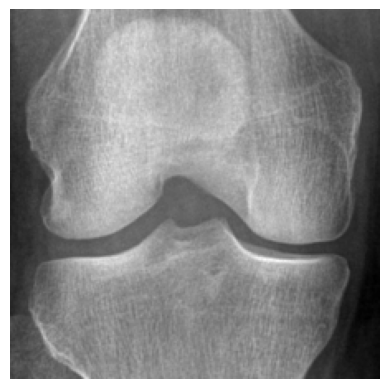


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9888738R.png: 224x224 0 0.67, 4 0.33, 5.2ms
Speed: 3.0ms preprocess, 5.2ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.6711
--------------------
Processing image: 9997856R.png


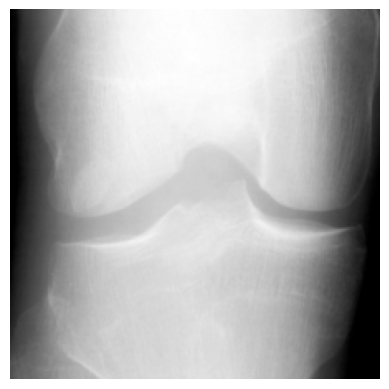


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9997856R.png: 224x224 0 0.75, 4 0.25, 5.8ms
Speed: 4.5ms preprocess, 5.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.7454
--------------------
Processing image: 9907402R.png


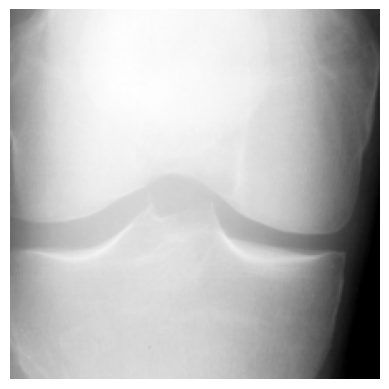


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9907402R.png: 224x224 0 0.54, 4 0.46, 10.6ms
Speed: 2.7ms preprocess, 10.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.5409
--------------------
Processing image: 9915764R.png


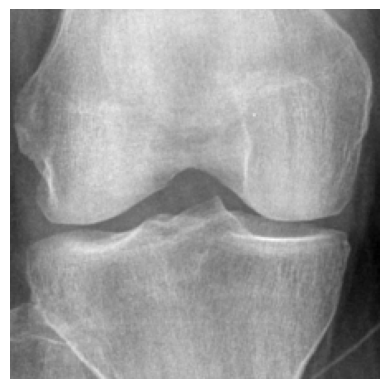


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9915764R.png: 224x224 0 0.70, 4 0.30, 10.0ms
Speed: 2.7ms preprocess, 10.0ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.6955
--------------------
Processing image: 9949467L.png


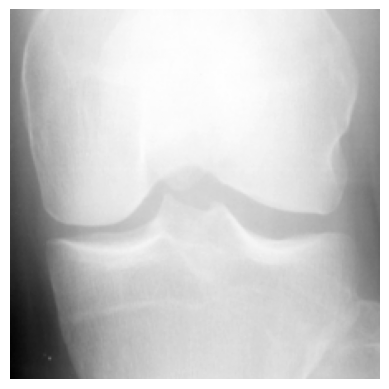


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9949467L.png: 224x224 4 0.59, 0 0.41, 4.7ms
Speed: 2.7ms preprocess, 4.7ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 4
  Confidence: 0.5866
--------------------
Processing image: 9999295L.png


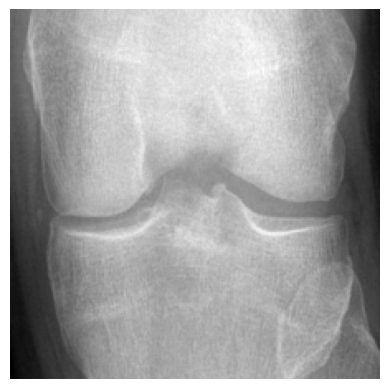


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9999295L.png: 224x224 0 0.71, 4 0.29, 4.9ms
Speed: 2.7ms preprocess, 4.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.7078
--------------------
Processing image: 9916542L.png


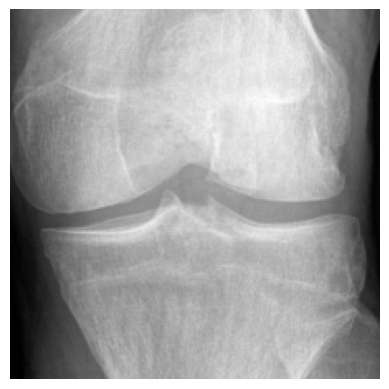


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9916542L.png: 224x224 0 0.75, 4 0.25, 5.0ms
Speed: 3.5ms preprocess, 5.0ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.7523
--------------------
Processing image: 9919343L.png


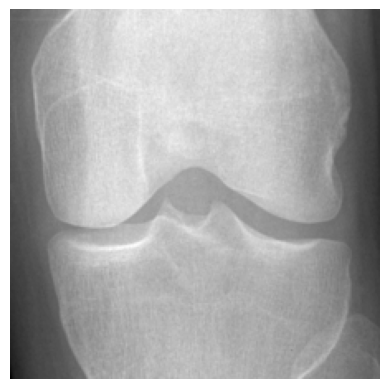


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9919343L.png: 224x224 0 0.59, 4 0.41, 4.4ms
Speed: 2.8ms preprocess, 4.4ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.5889
--------------------
Processing image: 9907909R.png


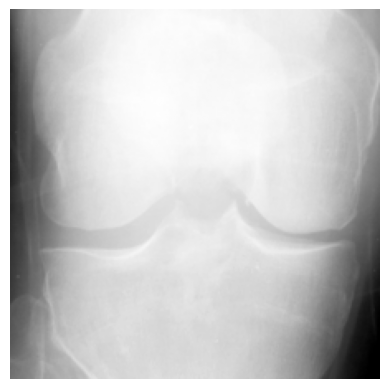


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9907909R.png: 224x224 4 0.51, 0 0.49, 4.9ms
Speed: 4.4ms preprocess, 4.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 4
  Confidence: 0.5079
--------------------
Processing image: 9893729L.png


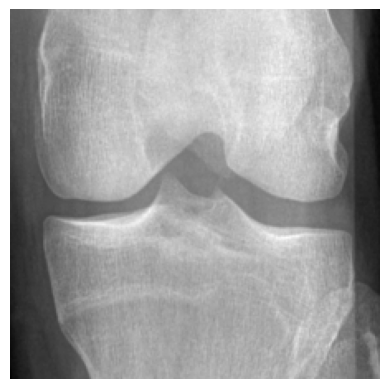


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9893729L.png: 224x224 0 0.77, 4 0.23, 6.0ms
Speed: 3.8ms preprocess, 6.0ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.7722
--------------------
Processing image: 9903777L.png


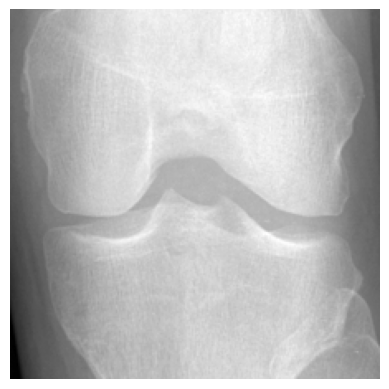


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9903777L.png: 224x224 4 0.56, 0 0.44, 4.7ms
Speed: 2.7ms preprocess, 4.7ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 4
  Confidence: 0.5608
--------------------
Processing image: 9974824R.png


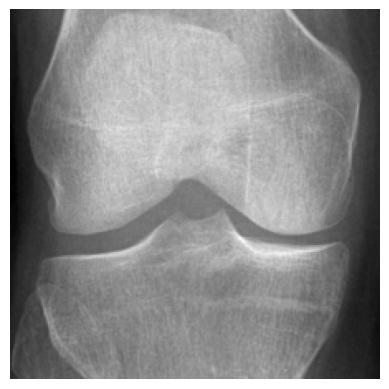


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9974824R.png: 224x224 0 0.63, 4 0.37, 4.7ms
Speed: 2.7ms preprocess, 4.7ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.6350
--------------------
Processing image: 9908315R.png


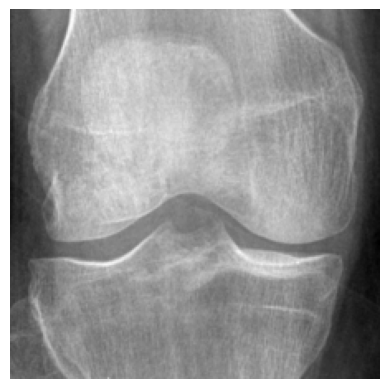


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9908315R.png: 224x224 0 0.58, 4 0.42, 5.6ms
Speed: 2.7ms preprocess, 5.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.5754
--------------------
Processing image: 9901658L.png


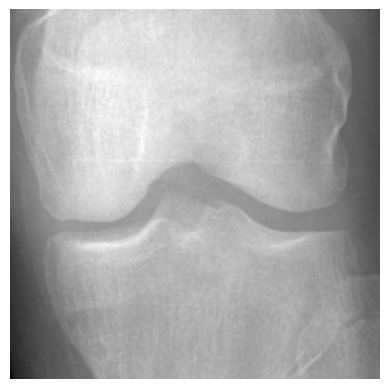


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9901658L.png: 224x224 0 0.66, 4 0.34, 5.1ms
Speed: 2.7ms preprocess, 5.1ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.6579
--------------------
Processing image: 9996851L.png


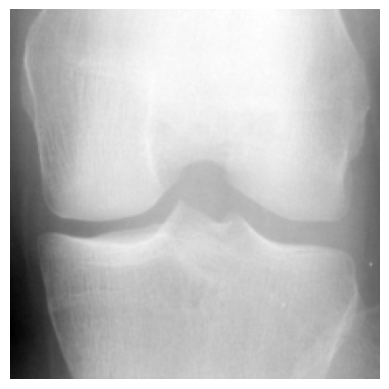


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9996851L.png: 224x224 4 0.61, 0 0.39, 9.4ms
Speed: 2.7ms preprocess, 9.4ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 4
  Confidence: 0.6072
--------------------
Processing image: 9996851R.png


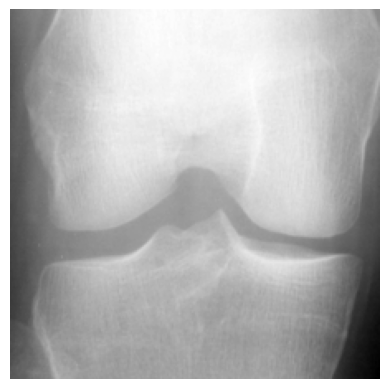


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9996851R.png: 224x224 0 0.63, 4 0.37, 8.2ms
Speed: 2.6ms preprocess, 8.2ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.6340
--------------------
Processing image: 9997869L.png


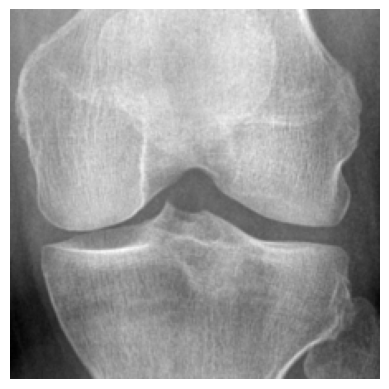


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9997869L.png: 224x224 4 0.55, 0 0.45, 4.9ms
Speed: 3.3ms preprocess, 4.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 4
  Confidence: 0.5479
--------------------
Processing image: 9974824L.png


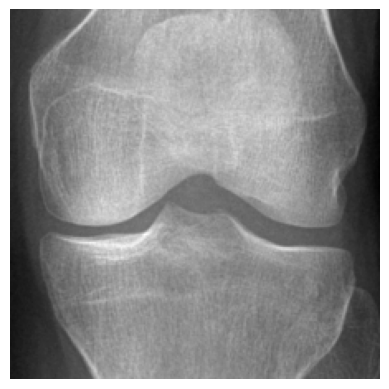


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9974824L.png: 224x224 0 0.65, 4 0.35, 4.8ms
Speed: 2.9ms preprocess, 4.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.6546
--------------------
Processing image: 9886598L.png


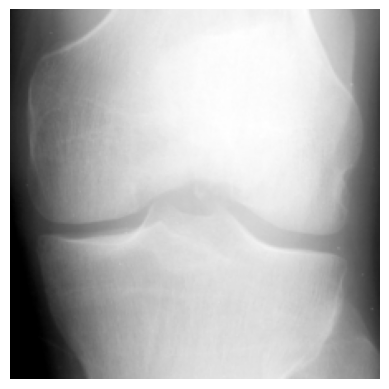


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9886598L.png: 224x224 0 0.67, 4 0.33, 4.5ms
Speed: 2.7ms preprocess, 4.5ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.6716
--------------------
Processing image: 9882107R.png


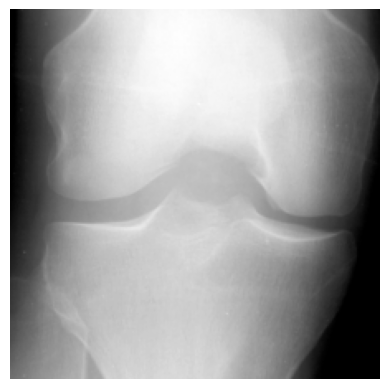


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9882107R.png: 224x224 0 0.79, 4 0.21, 4.3ms
Speed: 3.4ms preprocess, 4.3ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.7875
--------------------
Processing image: 9999865R.png


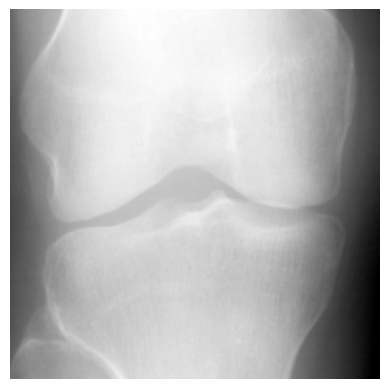


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9999865R.png: 224x224 0 0.64, 4 0.36, 5.2ms
Speed: 2.7ms preprocess, 5.2ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.6386
--------------------
Processing image: 9893729R.png


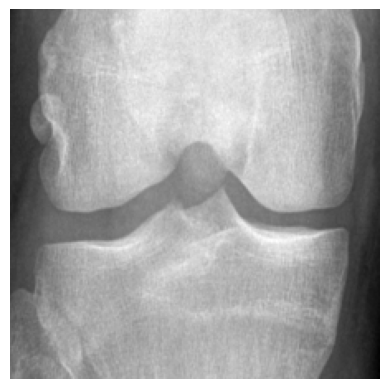


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9893729R.png: 224x224 0 0.74, 4 0.26, 8.0ms
Speed: 2.7ms preprocess, 8.0ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.7441
--------------------
Processing image: 9999365R.png


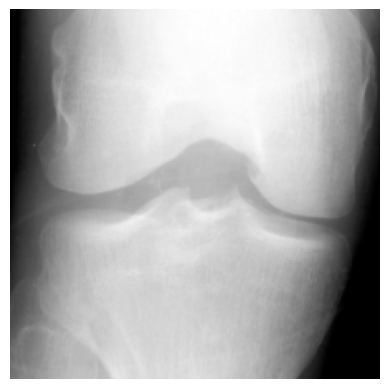


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9999365R.png: 224x224 0 0.74, 4 0.26, 7.6ms
Speed: 2.8ms preprocess, 7.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.7383
--------------------
Processing image: 9879774L.png


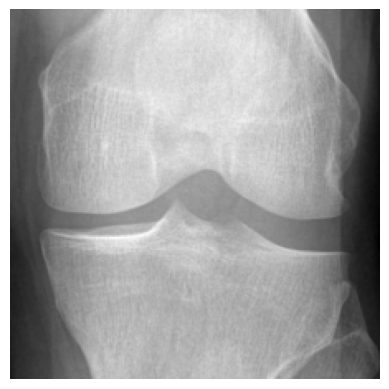


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9879774L.png: 224x224 0 0.73, 4 0.27, 9.9ms
Speed: 2.9ms preprocess, 9.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 0
  Confidence: 0.7323
--------------------
Processing image: 9943317R.png


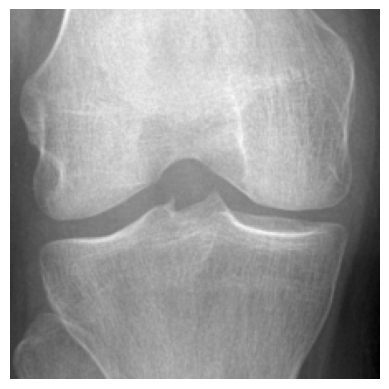


image 1/1 /content/drive/MyDrive/knee-xr/kneexrfinalexam/0/9943317R.png: 224x224 4 0.73, 0 0.27, 5.0ms
Speed: 2.9ms preprocess, 5.0ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  Top Predicted Class: 4
  Confidence: 0.7255
--------------------


In [ ]:
import os # import the os module to use operating system related functions
import matplotlib.pyplot as plt # import matplotlib for image plotting

# Specify the folder containing images, try 0, then 4
image_folder = "/content/drive/MyDrive/knee-xr/kneexrfinalexam/0"
#image_folder = "/content/drive/MyDrive/knee-xr/kneexrfinalexam/4"
# Function to display an image
def plotimage(image_path):
    """Displays an image using Matplotlib."""
    img = plt.imread(image_path)
    plt.imshow(img, cmap='grey')
    plt.axis('off') # Hide axis ticks
    plt.show()

# Iterate through each image in the folder
for filename in os.listdir(image_folder):
    if filename.endswith((".jpg", ".jpeg", ".png")):  # Adjust extensions as needed
        image_path = os.path.join(image_folder, filename)
        print(f"Processing image: {filename}")
        plotimage(image_path)
        try:
          # Perform inference
          results = knee_model(image_path)
          result = results[0]

          # Print top prediction for the current image
          top1_index = result.probs.top1
          top1_confidence = result.probs.top1conf.item()
          top1_name = result.names[top1_index]

          print(f"  Top Predicted Class: {top1_name}")
          print(f"  Confidence: {top1_confidence:.4f}")
          print("-" * 20)

        except Exception as e:
          print(f"Error processing {filename}: {e}")

#Try to calculate for yourself the confusion matrix with TP, TN, FP, FN
Also look at sensitivity, specifity,PPV, NPV,Accuracy.


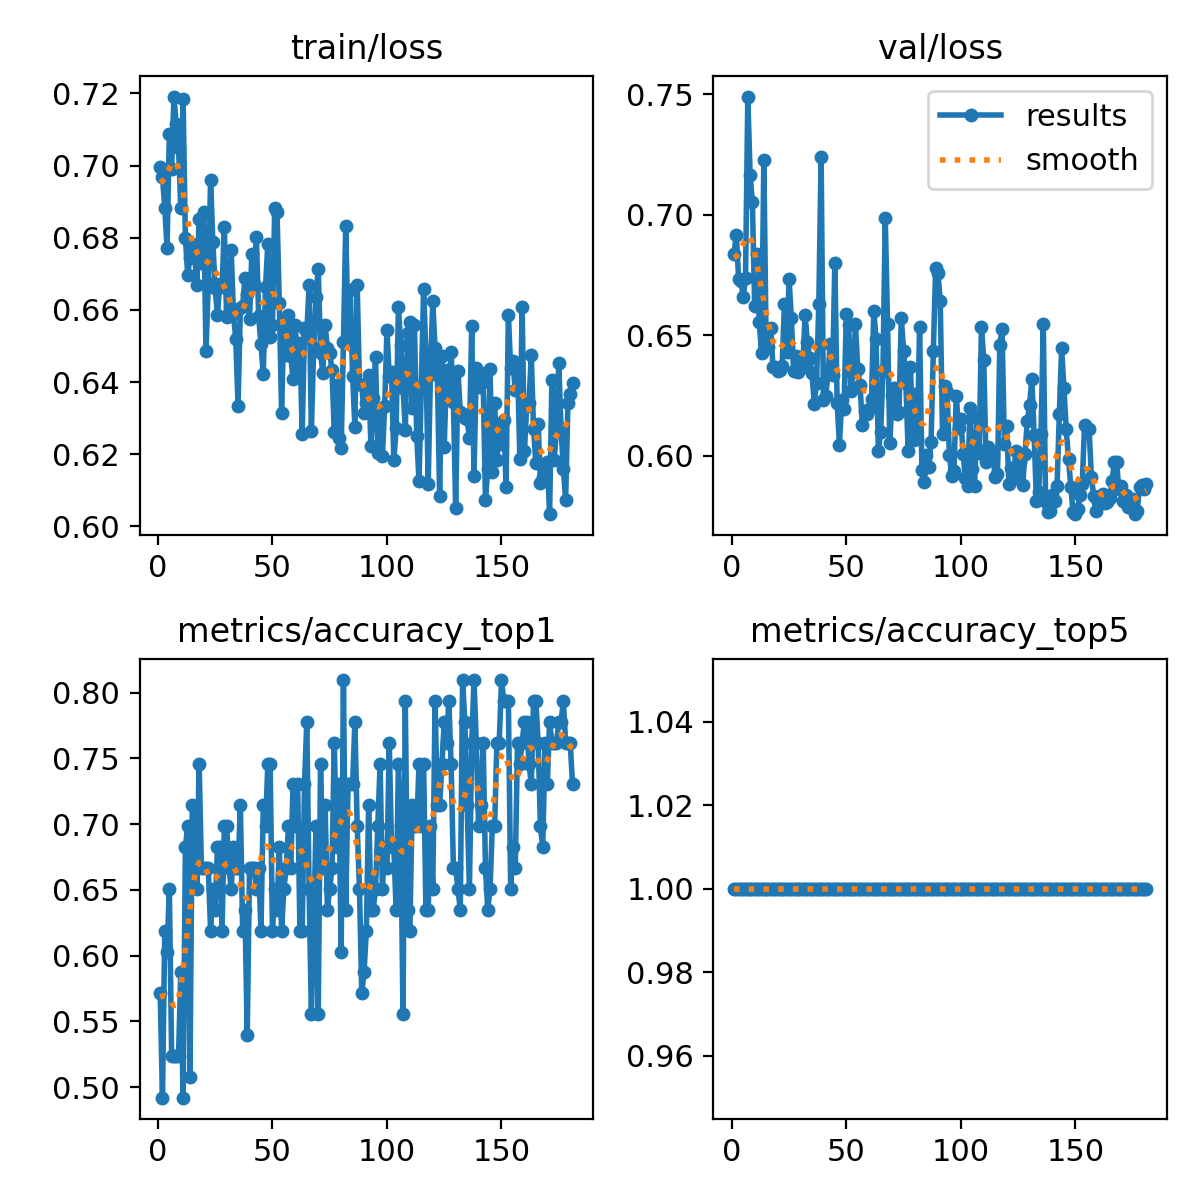

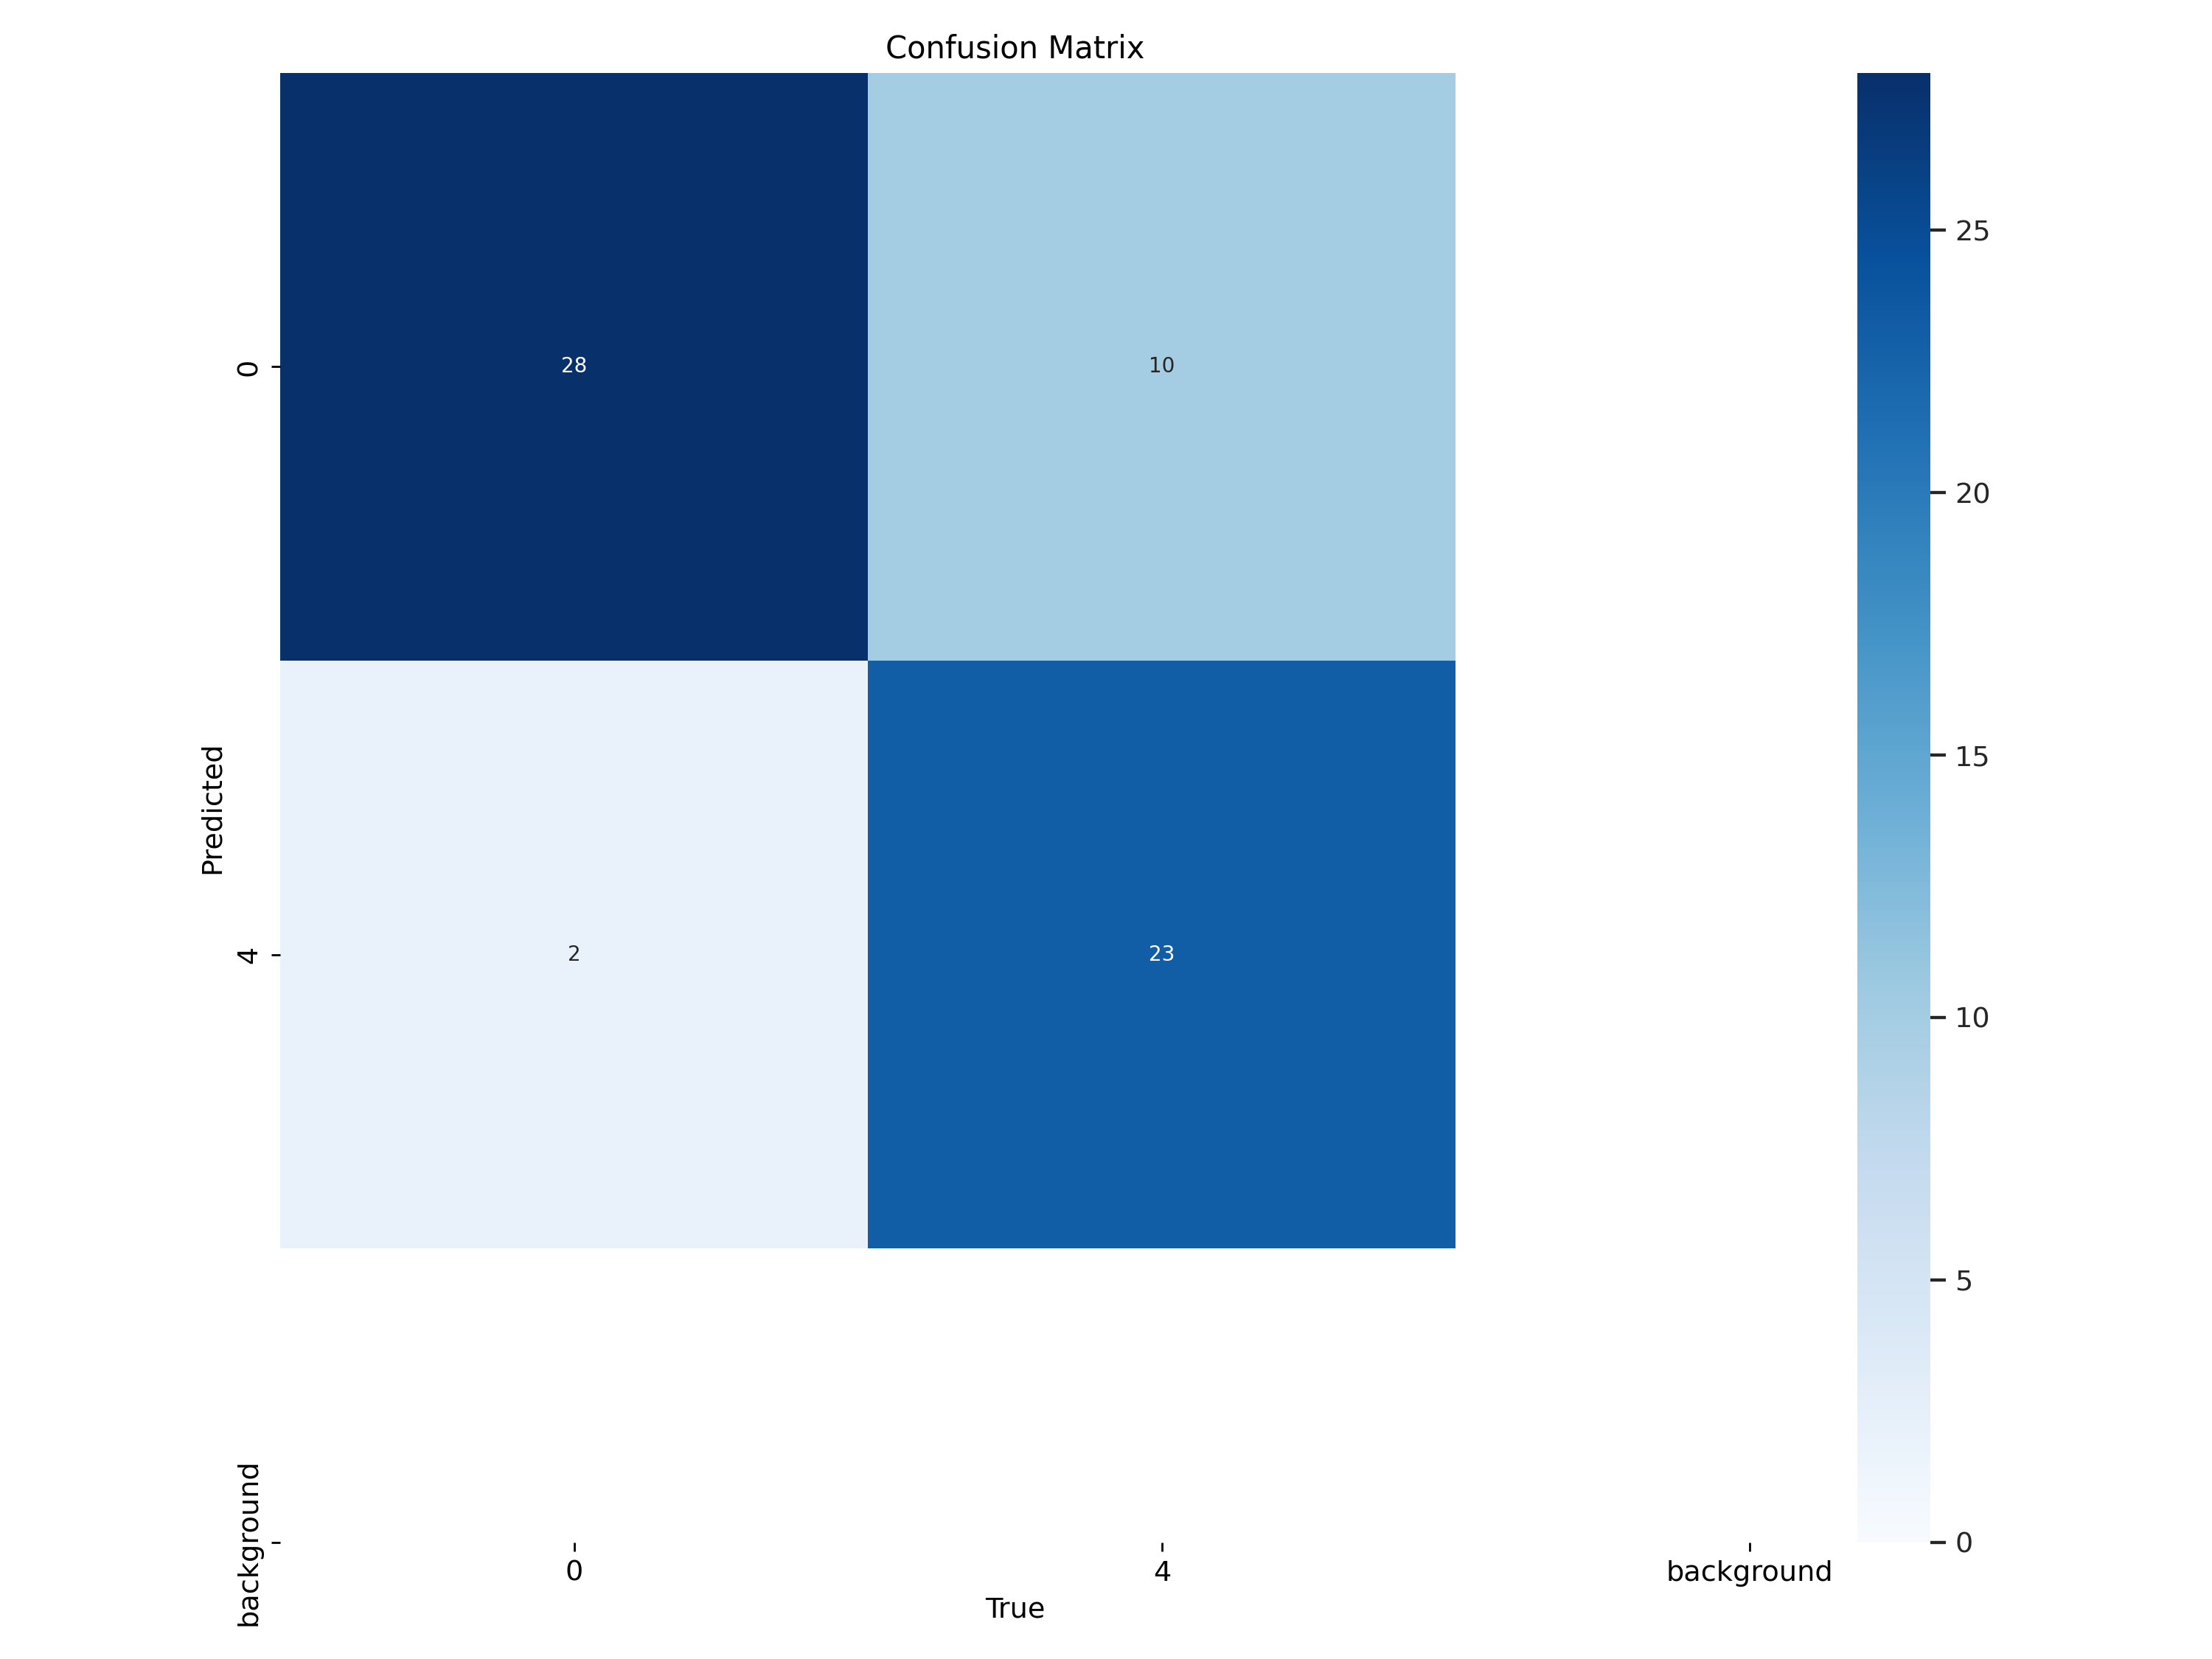

# **How good is this model**

Let's use the confusion matrix above

TP=True positive= 23
TN= 28
FP=2
FN=10

Accuracy = TP+TN/(TP+TN+FP+FN)= 0.81=81%

Sensitivity = TP / (TP + FN)=0.70=70%

Specificity =  TN / (TN + FP)= 93%

Positive Predictive Value = TP / (TP + FP) = 92%


So specificity is high, but sesitivity is not so great.

So if the model says osteoarthritis is probabaly correct, but will not pick up all the cases.





#**Try using different number of epochs and load up different images. Take pictures yourself, consider flower classification, car classification, or foods**